Name:   SUbrat Kishore Dutta
Matrikelnummer:  7028082
Email:   subratkishoredutta1234@gmail.com,sudu00001@stud.uni-saarland.de
   
Name:   
Matrikelnummer:   
Email:

Name:    
Matrikelnummer:    
Email:    

#### Preamble

In [1]:
# TODO: Import necessary libraries
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import solution as sol
import matplotlib.pyplot as plt
from torchmetrics import F1Score

In [2]:
torch.cuda.is_available()
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
print(device)

cuda:0


In [28]:
###Helper function
#calculating loss over a dataset
def test(model,test_loader):
        loss_fn = nn.CrossEntropyLoss()
        loss=0
        for i,(xs,ys) in enumerate(test_loader):
            xs=xs.to(device)
            ys=ys.to(device)
            pred = model(xs)
            loss+= loss_fn(pred,ys).item()
        print(loss/len(test_loader))
##function to get accuracy:
def get_accuracy(data,model):
    accdata=data
    for X,Y in accdata:
        X=X.to(device)
        Y=Y.to(device)
        ypred=model(X)
        train_acc = torch.sum(ypred.argmax(1) == Y)
        accuracy = train_acc/len(data)
    print(accuracy.item()*100,"%")
def get_f1(data,model):
    accdata=data
    for X,Y in accdata:
        X=X.to(device)
        Y=Y.to(device)
        f1= F1Score(task="multiclass", num_classes=10).to(device)
        ypred=model(X)
        f1 = f1(ypred.argmax(1),Y)
    print("F1 score:",f1.item())
def plot(par,lossrec,model):
    fig, axs = plt.subplots(1,2,figsize=(20,7))
    axs[0].set_title('epoch vs log loss')
    axs[0].plot(range(len(lossrec)),lossrec,color='orange',label='Training loss')
    axs[0].set_xlabel('epochs')
    axs[0].set_ylabel('log loss')
    par = [p.item() for p in par]
    axs[1].plot(range(len(par)),par,marker='o',color='violet',label='weight grad')
    axs[1].set_ylabel('norm of weights grad')
    axs[1].set_xlabel('epochs')
    axs[1].set_title('change of weight grad over epochs ')
    axs[1].legend()
    plt.show()
def plotrandomdata(data):
    for x,y in data:
        idx=[i.item() for i in torch.randint(0,128,(6,))]
        X=x[idx]
        fig,axs=plt.subplots(2,3)
        plt.suptitle('DATA')
        axs[0][0].imshow(X[0][0])
        axs[0][1].imshow(X[1][0])
        axs[0][2].imshow(X[2][0])
        axs[1][0].imshow(X[3][0])
        axs[1][1].imshow(X[4][0])
        axs[1][2].imshow(X[5][0])
        break

# 9.2 Design your CNN (4 points

Please create a ```solution.py``` file where you define the following:


1. A ```function``` where you use pytorch's Dataset and Dataloader class, and it should return you the desired split for the dataset. The function should have ```split``` as one of its argument and the call to Dataset class should respect this argument. The desired role of function is as follows:
    - Load the ```SVHN``` dataset using the built-in PyTorch datasets and data loaders.
    - Preprocess the data as needed, such as by resizing, cropping, and normalizing the images.
    - Returns the Dataloader object for specified split
    - **(Optional)** Try incorporating different transform based on whether it's **train / test / extra** ```split``` of dataset you are using. You are free to scour internet for this, but be sure to cite if you end up using someone else's code. You should also be able to explain **why** using different transform functions could be useful and what advantage your particular implementation has.
    
2. A ```class``` for your implementation of CNN which does the following:
    - Define the CNN model architecture, including the choice of layers, kernel size, and number of filters.
    - **(Optional)** treat number of layers, kernel size, filters, padding etc as arguments when you are defining your class. This would help you create different networks without having the need to edit ```solution.py``` file.
    


### Train your model(s) by importing your implementation from ```solution.py``` file in this notebook

- Define a loss function and optimizer for training the model.
- Train the model on the training data and evaluate its performance on the validation data.
- Adjust the hyper-parameters and model architecture as needed to improve performance.
- Test the different models on the test data and report the results. Do you see a relation of hyper-parameter tuning w.r.t. your design choices for the network?
- **Optionally** Briefly explain your observations from the last point. You may also want to consider evaluating the model on additional benchmarks or real-world tasks to demonstrate its performance in different settings to present during tutorials. You will receive an **additional bonus** point for this.

In [5]:
# TODO: Run your experiments and plot the results
##declaring the dataset:
train_dl = sol.datagen('train',128)
test_dl = sol.datagen('test',128)

making your data :/)
Using downloaded and verified file: ./data\train_32x32.mat
making your data :/)
Using downloaded and verified file: ./data\test_32x32.mat


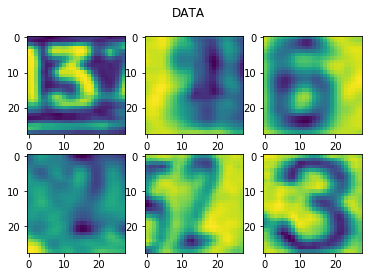

In [6]:
plotrandomdata(train_dl)

In [10]:
## setting model parameters
learning_rate = 0.001
epochs=500


In [11]:
##declaring the model
model = sol.Model(3,32,5,10,3) ## input_channel,hidden_channel,filter size,num_classes,number of layers
model.to(device)

Model(
  (layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=32, out_features=350, bias=True)
    (14): ReLU()
    (15): Linear(in_features=350, out_features=10, bias=True)
    (16): Softmax(dim=None)
  )
)

In [12]:
Tloss=[]
Twgrad=[]

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(),lr=learning_rate)
lossrec=[]
wgrad=[]
for epoch in range(epochs):
    tloss=0
    for i,(xs,ys) in enumerate(train_dl):
        xs=xs.to(device)
        ys=ys.to(device)
        pred = model(xs)
        loss = loss_fn(pred,ys) 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss+=loss
    a=0    
    for p in model.parameters():
        a+=torch.norm(p.grad)
    wgrad.append(a)
    lossrec.append((tloss/len(train_dl)).log().item())
    print('epoch:',epoch,'loss:',(tloss/len(train_dl)).item())
Tloss+=lossrec
Twgrad+=wgrad

C:\Users\Asus\Anaconda3\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch: 0 loss: 2.2292652130126953
epoch: 1 loss: 2.1485109329223633
epoch: 2 loss: 2.1179933547973633
epoch: 3 loss: 2.0995585918426514
epoch: 4 loss: 2.0885543823242188
epoch: 5 loss: 2.081393241882324
epoch: 6 loss: 2.076618194580078
epoch: 7 loss: 2.0730512142181396
epoch: 8 loss: 2.070206880569458
epoch: 9 loss: 2.0678110122680664
epoch: 10 loss: 2.0658390522003174
epoch: 11 loss: 2.06415057182312
epoch: 12 loss: 2.062673330307007
epoch: 13 loss: 2.061361789703369
epoch: 14 loss: 2.060176372528076
epoch: 15 loss: 2.0590662956237793
epoch: 16 loss: 2.058053731918335
epoch: 17 loss: 2.057131767272949
epoch: 18 loss: 2.0562703609466553
epoch: 19 loss: 2.0555012226104736
epoch: 20 loss: 2.0547890663146973
epoch: 21 loss: 2.0541303157806396
epoch: 22 loss: 2.053518056869507
epoch: 23 loss: 2.0529425144195557
epoch: 24 loss: 2.052405595779419
epoch: 25 loss: 2.0519049167633057
epoch: 26 loss: 2.05143404006958
epoch: 27 loss: 2.050987482070923
epoch: 28 loss: 2.050565242767334
epoch: 29 l

epoch: 234 loss: 2.031686782836914
epoch: 235 loss: 2.0316545963287354
epoch: 236 loss: 2.0316193103790283
epoch: 237 loss: 2.031586170196533
epoch: 238 loss: 2.031553268432617
epoch: 239 loss: 2.031522750854492
epoch: 240 loss: 2.031487464904785
epoch: 241 loss: 2.0314552783966064
epoch: 242 loss: 2.0314221382141113
epoch: 243 loss: 2.0313897132873535
epoch: 244 loss: 2.031359910964966
epoch: 245 loss: 2.03132700920105
epoch: 246 loss: 2.031296491622925
epoch: 247 loss: 2.031264066696167
epoch: 248 loss: 2.0312328338623047
epoch: 249 loss: 2.031201124191284
epoch: 250 loss: 2.0311694145202637
epoch: 251 loss: 2.031139850616455
epoch: 252 loss: 2.031107187271118
epoch: 253 loss: 2.0310776233673096
epoch: 254 loss: 2.0310471057891846
epoch: 255 loss: 2.0310168266296387
epoch: 256 loss: 2.030986785888672
epoch: 257 loss: 2.0309555530548096
epoch: 258 loss: 2.030925750732422
epoch: 259 loss: 2.030897617340088
epoch: 260 loss: 2.030866861343384
epoch: 261 loss: 2.030837059020996
epoch: 262

epoch: 465 loss: 2.026503324508667
epoch: 466 loss: 2.0264885425567627
epoch: 467 loss: 2.0264732837677
epoch: 468 loss: 2.026456832885742
epoch: 469 loss: 2.026442527770996
epoch: 470 loss: 2.0264272689819336
epoch: 471 loss: 2.0264110565185547
epoch: 472 loss: 2.0263946056365967
epoch: 473 loss: 2.0263819694519043
epoch: 474 loss: 2.026366710662842
epoch: 475 loss: 2.026350975036621
epoch: 476 loss: 2.026336193084717
epoch: 477 loss: 2.026322364807129
epoch: 478 loss: 2.026306390762329
epoch: 479 loss: 2.0262906551361084
epoch: 480 loss: 2.0262763500213623
epoch: 481 loss: 2.0262627601623535
epoch: 482 loss: 2.026247501373291
epoch: 483 loss: 2.0262327194213867
epoch: 484 loss: 2.0262181758880615
epoch: 485 loss: 2.0262036323547363
epoch: 486 loss: 2.0261878967285156
epoch: 487 loss: 2.0261735916137695
epoch: 488 loss: 2.026158571243286
epoch: 489 loss: 2.026144027709961
epoch: 490 loss: 2.0261313915252686
epoch: 491 loss: 2.026116132736206
epoch: 492 loss: 2.0261037349700928
epoch: 

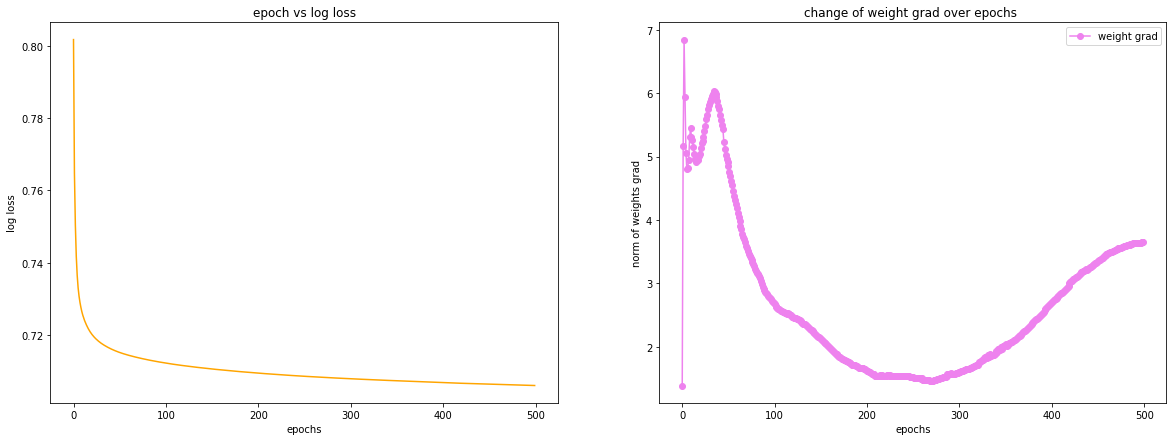

In [14]:
plot(Twgrad,Tloss,model)

In [23]:
print("Loss on test:")
test(model,test_dl)
print("Training accuracy:")
get_accuracy(train_dl,model)
print("Test accuracy:")
get_accuracy(test_dl,model)
print("Training f1 score:")
get_f1(train_dl,model)
print("Test f1 score:")
get_f1(test_dl,model)

Loss on test:
2.015933829195359
Training accuracy:
2.6178009808063507 %
Test accuracy:
11.764706671237946 %
Training f1 score:


RuntimeError: Encountered different devices in metric calculation (see stacktrace for details). This could be due to the metric class not being on the same device as input. Instead of `metric=MulticlassF1Score(...)` try to do `metric=MulticlassF1Score(...).to(device)` where device corresponds to the device of the input.

In [29]:
get_f1(train_dl,model)

F1 score: 0.3658536672592163


tensor(0)


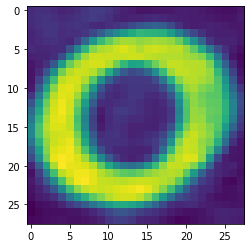

In [6]:
plt.imshow(x[4][0])
print(y[4])

tensor(1)


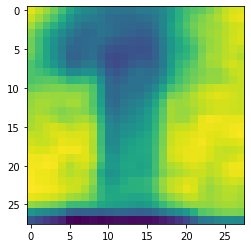

In [7]:
plt.imshow(x[8][0])
print(y[8])

## BONUS (1.5 + 1.5 points)
- Recall the custom Dataset and DataLoaders exercise from the first assignment? Create a custom data-loading pipeline (i.e. Dataset and Dataloader) to be used with your model. Implement the transform functionality as collate_fn. (0.5 + 1)
- Consider using a pre-trained model as a starting point and fine-tuning it on the SVHN dataset. Briefly contrast the performance with your design choices to justify the gain or loss in performance.

Here are some tutorials for finetuning pre-trained models: https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html & https://huggingface.co/docs/transformers/training

In [ ]:
# Bonus TODO: